# Analysis of PYN program data

In [2]:
# load libraries 
library(ggplot2) # Graph library 

### Load data 
For efficient data analysis tidyverse package can be used. 

In [1]:
#  header parameter has been changed after viewing the data
df<- read.csv('task_data.csv', header = T)
schema<-read.csv('task_metadata.csv',header = F) 

Exploring dataframe and schema

In [3]:
# View Dimensions
dim(df)
dim(schema)
# View Columns
names(df)
names(schema)

[1] 15197    12

[1] 12  2

[1] "online_enrollment_id" "status.app"           "zip_code"            
 [4] "race"                 "gender"               "age.at.start"        
 [7] "school.status"        "worked"               "gp"                  
[10] "total.hours"          "total.wages"          "retained"

[1] "V1" "V2"

* Since task_metadata.csv does not contain header , header flag has been added 

* Put standard column names for schema dataframe

In [4]:
colnames(schema) <- c('column_name','column_description') 
names(schema)

[1] "column_name"        "column_description"

In [5]:
head(df)
schema

online_enrollment_id,status.app,zip_code,race,gender,age.at.start,school.status,worked,gp,total.hours,total.wages,retained
6867883,NA,19133,Black / African-American,Female,20,NA,1,0,809.0,8270.90,1
6910786,Online Application Submitted,19139,Black / African-American,Female,18,Post-secondary School,1,0,558.5,5690.85,1
6918343,Incomplete,19104,Black / African-American,Male,16,In School,1,0,599.0,4992.00,1
6924755,Online Application Submitted,19131,Black / African-American,Male,22,Post-secondary School,1,1,536.5,4710.50,1
6910845,Approved for all jobs,19139,Black / African-American,Female,17,In School,1,0,611.0,5499.00,1
6917744,Incomplete,19139,Black / African-American,Female,18,In School,1,1,458.0,4172.00,1


column_name,column_description
online_enrollment_id,Unique id number of the applicant
status.app,Status of the application
zip_code,Home zip code of the applicant
race,Race / ethnicity of the applicant
gender,Gender of the applicant
age.at.start,Age at the start of the program
school.status,School status of applicant
worked,"Did the applicant particiapte in the program? 1 = yes, 0 = no"
gp,"General pool (applied without a connection to a specific provider); 1 = yes, 0 = no"
total.hours,Total hours worked in the program


### Understanding the structure of  data

In [8]:
library(dplyr)

In [9]:
glimpse(df)

Observations: 15,197
Variables: 12
$ online_enrollment_id <int> 6867883, 6910786, 6918343, 6924755, 6910845, 6...
$ status.app           <fct> NA, Online Application Submitted, Incomplete, ...
$ zip_code             <int> 19133, 19139, 19104, 19131, 19139, 19139, 1913...
$ race                 <fct> Black / African-American, Black / African-Amer...
$ gender               <fct> Female, Female, Male, Male, Female, Female, Ma...
$ age.at.start         <int> 20, 18, 16, 22, 17, 18, 23, 16, 20, 16, 18, 18...
$ school.status        <fct> NA, Post-secondary School, In School, Post-sec...
$ worked               <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ gp                   <int> 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1...
$ total.hours          <dbl> 809.00, 558.50, 599.00, 536.50, 611.00, 458.00...
$ total.wages          <dbl> 8270.900, 5690.850, 4992.000, 4710.500, 5499.0...
$ retained             <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...


* Change the datatype of online_enrollment_id , zip_code

In [10]:
df[, c(1,3)] <- sapply(df[, c(1,3)], as.factor)
summary(df)

 online_enrollment_id                                              status.app  
 Length:15197         Online Application Submitted                      :6481  
 Class :character     Approved for jobs not requiring clearances        :3585  
 Mode  :character     Approved for all jobs                             :3514  
                      Provisional approval for jobs requiring clearances: 979  
                      Incomplete                                        : 563  
                      (Other)                                           :  38  
                      NA's                                              :  37  
   zip_code                               race          gender    
 Length:15197       Black / African-American:11723   Female:8512  
 Class :character   Hispanic/White          :  998   Male  :6675  
 Mode  :character   Caucasian/White         :  897   NA's  :  10  
                    Hispanic/Black          :  832                
                    Asian

Summary function in R gives statistical summary of the all the columns that contains continuous varaible and deails of columns that contains character varaible.
It provides information about  **Missing Values** 


In [86]:
# Finding total missing values - It gives cell count
sum(is.na(df))

[1] 20549

##### Most of the missing data is in Total Hour and Total Wages,  I  can't replace mean value of the column in NA's without knowing the reason for the source of error.  It may be possible that data entry for there records are incomplete.

Remove all the records with NA attribute

## Data Cleaning

In [11]:
# df<-na.omit(df)
# dim(df)
# summary(df)

# total.hours and total.wages columns are central point of my analysis and both of them contains 
#  5717 missing values so I am removing all the rows that that has NA for these columns
dim(df)
df<-df[!is.na(df$total.hours),]
dim(df)
df<-df[!is.na(df$total.wages),]
dim(df)

[1] 15197    12

[1] 9480   12

[1] 9480   12

As we can see above that removing rows containing NA for total.hours column also removed NA all the values in total.wages column. 

**Boxplot for hourly wages to find any Outlier**

Warning message:
"Removed 3417 rows containing non-finite values (stat_boxplot)."

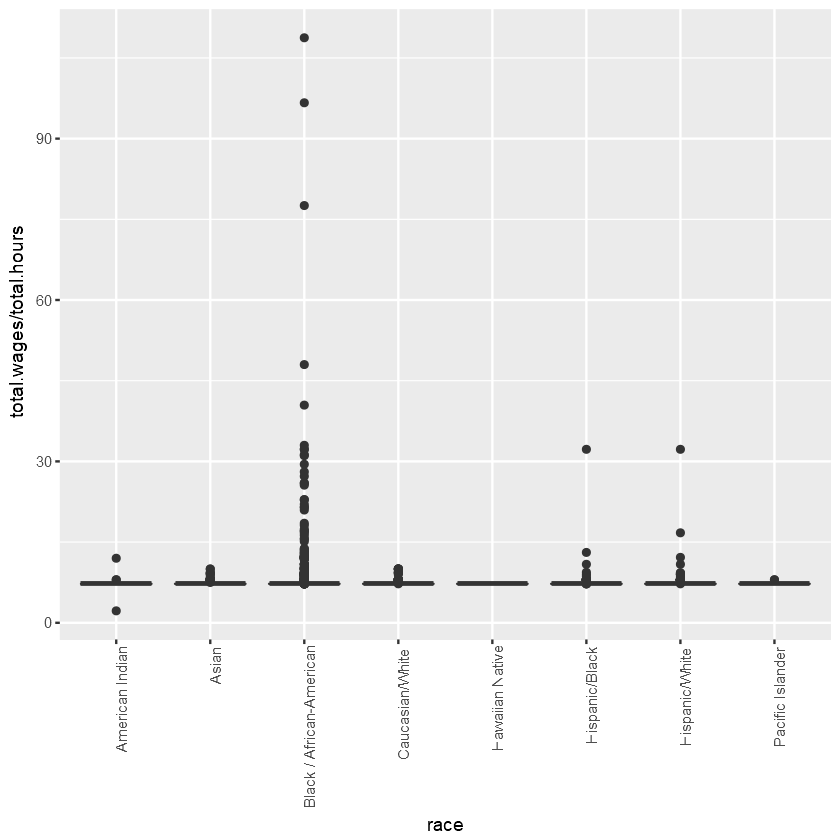

In [12]:
ggplot(df, aes(race,total.wages/total.hours)) + geom_boxplot() +
theme(axis.text.x = element_text(angle = 90, hjust = 1))

Find out those who are above earning above mean

In [13]:
av<- sum(df$total.wages)/sum(df$total.hours)
df$hourly_wage<-ifelse(df$total.hours==0, NA, df$total.wages/df$total.hours)
summary(df$hourly_wage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  2.222   7.250   7.250   7.508   7.250 108.750    3417 

### Analysis of  records where hourly wage is NA and above average,

**Since we have already removed NA from original dataframe NA is new dataframe could be due to error in formaula total.wage/total.hour and it is only possible beacuse of 0 division error.**

In [15]:
new_df <- df[is.na(df$hourly_wage),]
dim(new_df)

[1] 3417   13

In [16]:
head(new_df[c('online_enrollment_id','total.wages','total.hours','hourly_wage')])
# These records should be checked for verification as there payment has been done without entering 
# working hours
write.csv(new_df,"Records_for_Verification.csv")

,online_enrollment_id,total.wages,total.hours,hourly_wage
4779,6898115,760,0,NA
4780,6898116,760,0,NA
4781,6897728,760,0,NA
4782,6897724,760,0,NA
4784,6897715,760,0,NA
4785,6897711,760,0,NA


#### Records in Records_for_Verification.csv files should be sent for verification because payment has been done without entering working hours in the database.
Filtering saved records

In [17]:
df<-na.omit(df)
dim(df)

# Code to find out lier
#  Since Quantiles Q1,Q2 and Q3 are same I am considering any value from mean as out lier
threshold <- mean(df$hourly_wage)
outlier_df<- df[(df[,13]>threshold*2),]
dim(outlier_df)

[1] 6047   13

[1] 35 13

In [18]:
outlier_df<-arrange(outlier_df,  desc(hourly_wage))
head(outlier_df)

online_enrollment_id,status.app,zip_code,race,gender,age.at.start,school.status,worked,gp,total.hours,total.wages,retained,hourly_wage
6933400,Approved for jobs not requiring clearances,19119,Black / African-American,Female,18,In School,1,0,8.00,870.000,0,108.75000
6923991,Approved for jobs not requiring clearances,19132,Black / African-American,Female,17,In School,1,0,9.00,870.000,0,96.66667
6911148,Approved for jobs not requiring clearances,19139,Black / African-American,Female,16,In School,1,0,5.75,446.000,0,77.56522
6925906,Online Application Submitted,19139,Black / African-American,Female,19,Out of School,1,0,3.75,180.000,0,48.00000
6915433,Approved for jobs not requiring clearances,19145,Black / African-American,Female,18,In School,1,0,21.50,870.005,0,40.46535
6906064,Approved for all jobs,19139,Black / African-American,Female,16,In School,1,1,2.00,66.000,0,33.00000


**Removing top five highly paid individual considering passible source of data entry error.**

In [19]:
df<-arrange(df,  desc(hourly_wage))
df<- df[-c(1,2,3,4,5),]

In [20]:
max(df$hourly_wage)
dim(df)

[1] 33

[1] 6042   13

## Exploratory Analysis of cleaned data

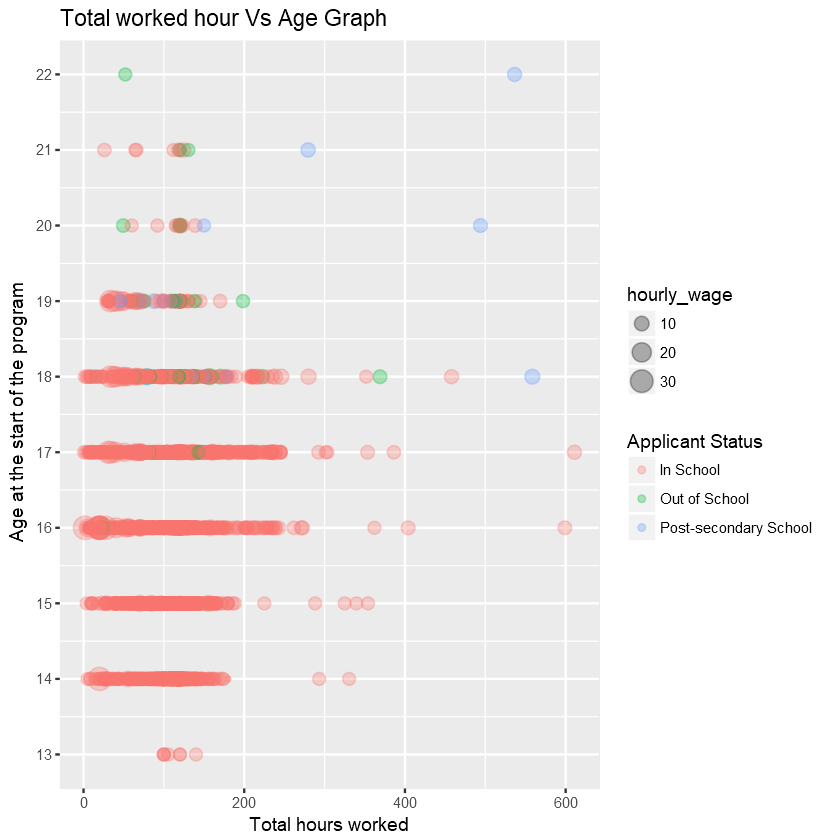

In [30]:
ggplot(df , aes(x=total.hours, y=age.at.start, color= school.status, size= hourly_wage))+
    geom_point(alpha = 0.3) +
    scale_y_continuous(name="Age at the start of the program", breaks = 13:22)+
    scale_x_continuous(name="Total hours worked") +
    ggtitle("Total worked hour Vs Age Graph") +
    labs(colour = "Applicant Status")

Above graph shows that most of the students are in School and Student who have started at age of 16, 17 and 18 are working more that other age group

race,count
American Indian,23
Asian,323
Black / African-American,4455
Caucasian/White,519
Hawaiian Native,4
Hispanic/Black,309
Hispanic/White,396
Pacific Islander,13


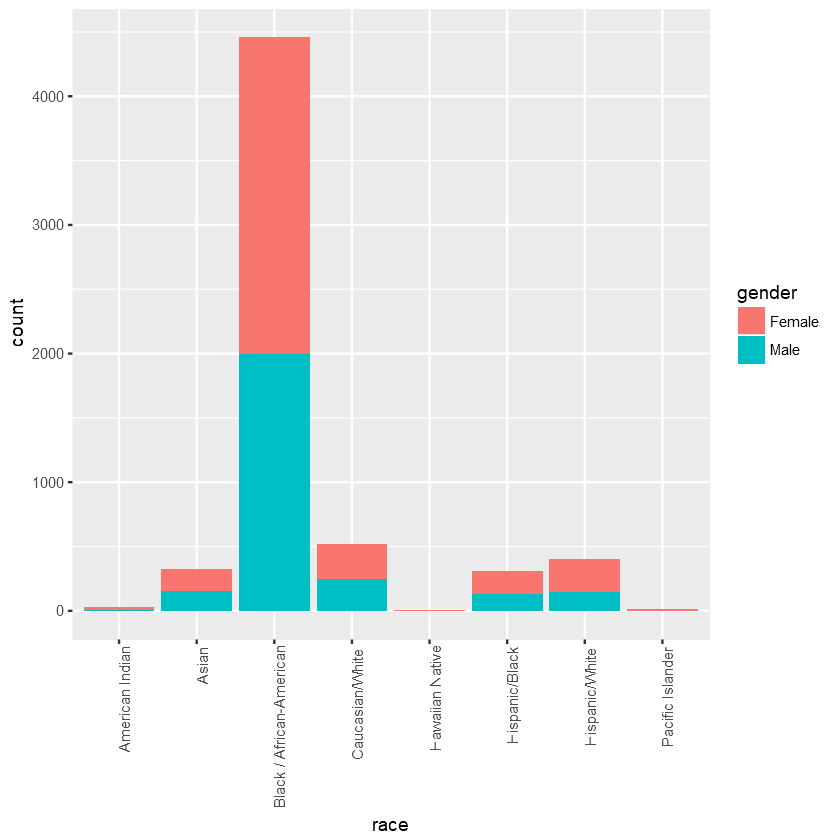

In [41]:
df %>%
    group_by(race) %>%
    summarise(count = n()) 
#     ggplot(aes(x = (race), y = cnt)) +
#     geom_bar(stat = "identity") +
#     theme(axis.text.x=element_text(angle = -90, hjust = 0))

qplot(race, data= df, fill=gender)+ theme(axis.text.x = element_text(angle = 90, hjust = 1))
# ggplot(df, aes(x=hourly_wage,fill=factor(retained))) + stat_bin()

**Out of all Black/African-American Students are more than other. We need True demographic proportion of population to conclude this fact.**

[1] 5066

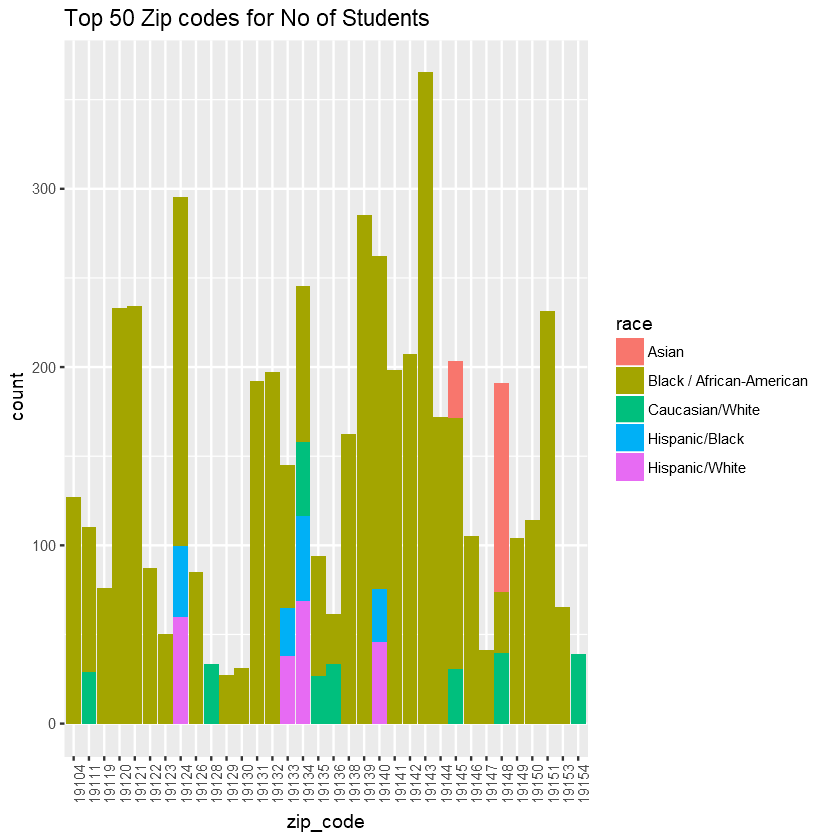

In [80]:
pop<- df %>%
    group_by(zip_code,race) %>%
    summarise(count = n()) 
pop<-arrange(pop,  desc(count))

gr_pop<-pop[1:50,]

sum(gr_pop$count)

ggplot(gr_pop, aes(x = zip_code, y = count,fill = race, label=count)) +
geom_bar(stat = "identity")+
ggtitle("Top 50 Zip codes for No of Students") +
theme(axis.text.x = element_text(angle = 90, hjust = 1))

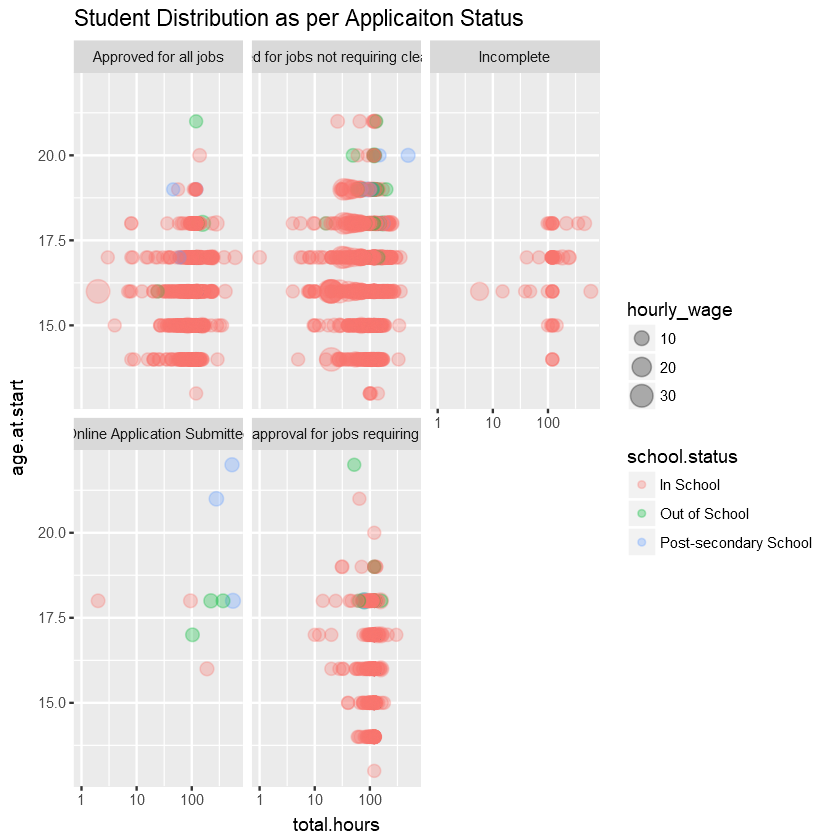

In [73]:
ggplot(df , aes(x=total.hours, y=age.at.start, color= school.status, size= hourly_wage))+
ggtitle("Student Distribution as per Applicaiton Status") +
geom_point(alpha = 0.3) + scale_x_log10() + facet_wrap (~status.app)

**Students who are approved for all jobs or do not require clearing have all the highest paying jobs**

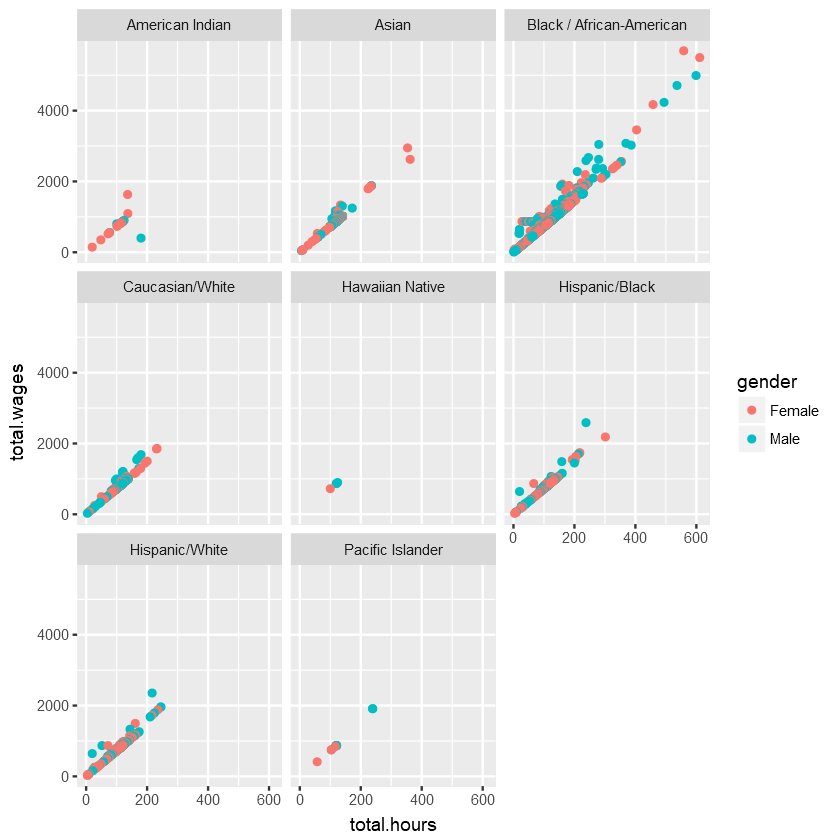

In [150]:
ggplot(df, aes(x = total.hours, y = total.wages, color = gender)) +  
geom_point()+ facet_wrap(~race)

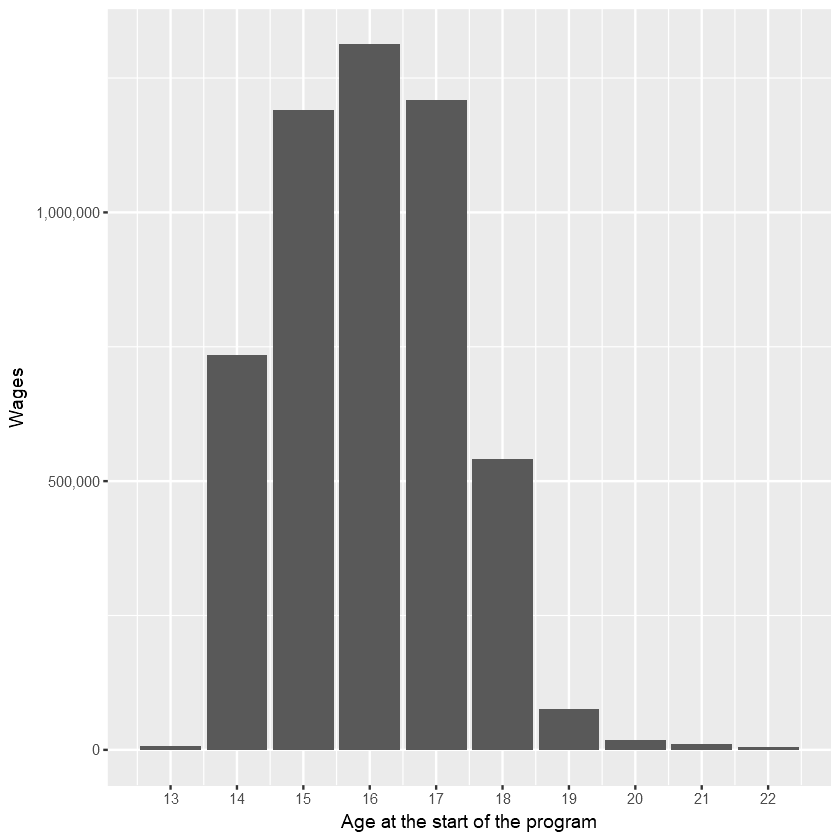

In [72]:
by_status<- df %>%
            group_by(age.at.start) %>%
            summarize(wage = sum(total.wages))

ggplot(by_status, aes(x= age.at.start, y= wage )) + 
scale_y_continuous(name="Wages", labels = scales::comma)+
scale_x_continuous(name="Age at the start of the program", breaks = 13:22) +
geom_col()

** Some more Reports**

In [78]:
df %>%
    group_by(school.status) %>%
    summarise(mean_hours=mean(total.hours), mean_wages=mean(total.wages))

anova_df<-df %>%
    group_by(race) %>%
    summarise(count=n(),mean_HW=mean(hourly_wage))
#     summarise(mean_hours=mean(total.hours), mean_wages=mean(total.wages),mean_HW=mean(hourly_wage))
anova_df
# Compute the analysis of variance
res.aov <- aov(hourly_wage ~ race, data = df)
# Summary of the analysis
summary(res.aov)

school.status,mean_hours,mean_wages
In School,113.5908,840.5065
Out of School,118.8433,911.5414
Post-secondary School,168.0100,1394.8315


race,count,mean_HW
American Indian,23,7.303140
Asian,323,7.355586
Black / African-American,4455,7.470505
Caucasian/White,519,7.346676
Hawaiian Native,4,7.250000
Hispanic/Black,309,7.463447
Hispanic/White,396,7.453474
Pacific Islander,13,7.365385


              Df Sum Sq Mean Sq F value Pr(>F)
race           7     11   1.585    0.93  0.481
Residuals   6034  10277   1.703               

As the p-value is greater than the significance level 0.05, we can conclude that there are no significant differences between the hourly wage of the group based on Race.

**Similarly Multiple pairwise-comparison between the means of groups can be done**

In [82]:
pop1<- df %>%
    group_by(df$gp) %>%
    summarise(count = n()) 
pop1

pop2<- df %>%
    group_by(df$retained) %>%
    summarise(count = n()) 
pop2

df$gp,count
0,4494
1,1548


df$retained,count
0,1222
1,4820


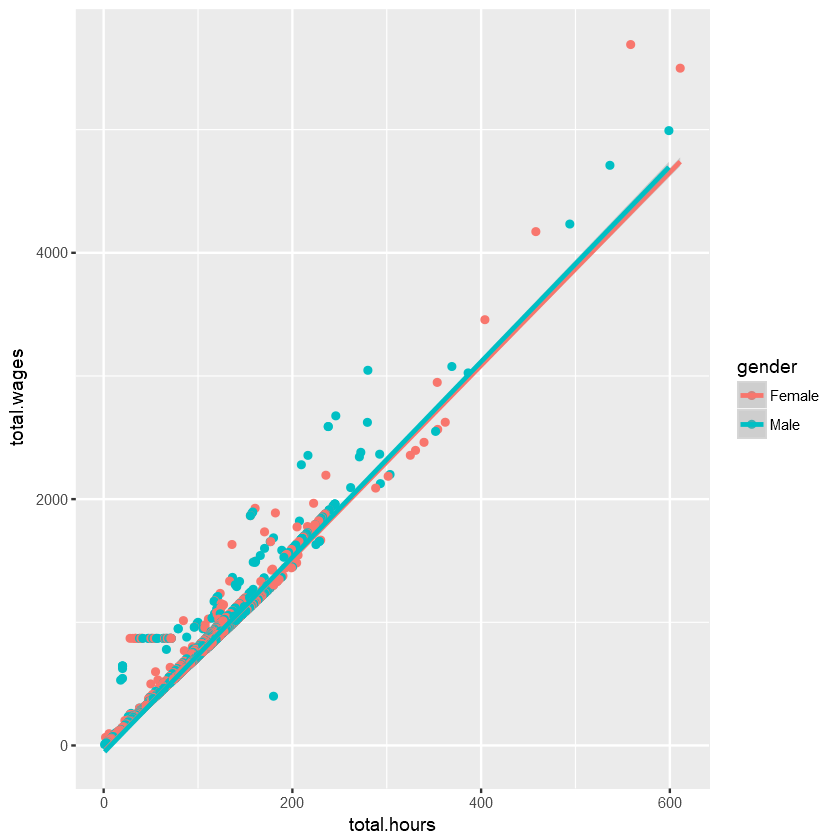

In [137]:
ggplot(df, aes(x = total.hours, y = total.wages, color = gender)) +  geom_point()+
geom_smooth(method = "lm")

Linear Regression Line for the Male and Female Student worker total wage by total hours.
**Male students earn slightly more than female Students**

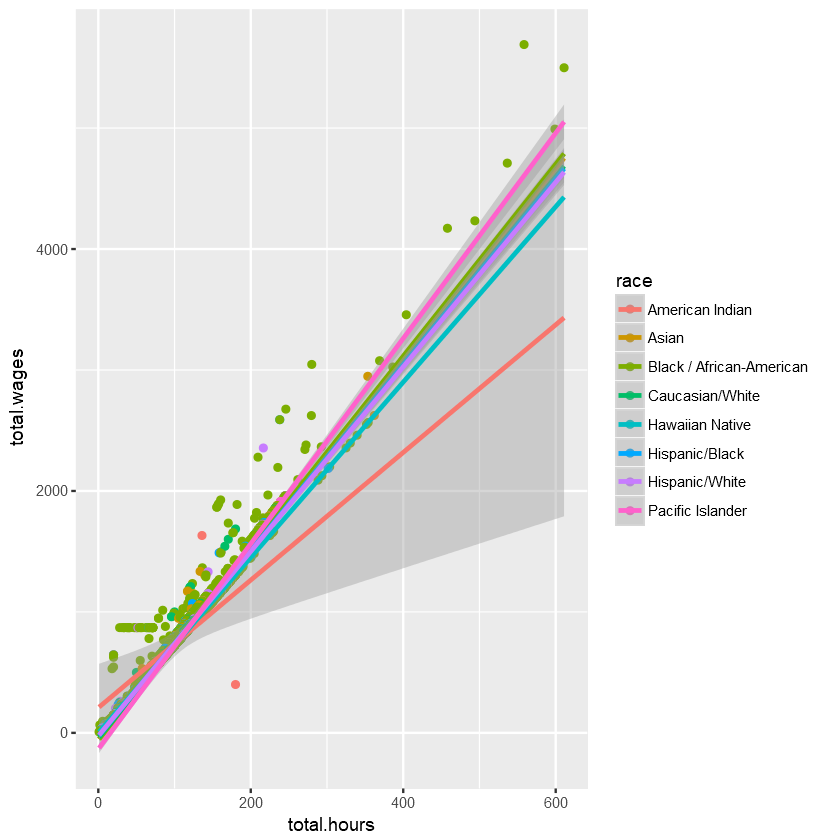

In [74]:
ggplot(df, aes(x = total.hours, y = total.wages, color = race)) +  geom_point()+
geom_smooth(method = "lm", fullrange = TRUE)

Full Range Linear prediction is very basic forecasting. **American Indian wage rate is least**

# Analysis Report

- Demographic data is required to comment about proportaion of student based on race.
- Most of the student worker are still in the school 
- Given data is not complete, almost 5000 students' wages and hours are not filled
- out of 6000 of the valid records , 5000 of the students are from 50 Zip Codes area
- More attributes of Students would help to formulate a model that can predict whether they will be retailed or not